## About Dataset

#### Dataset
- IBM Telco Customer Churn dataset available on GitHub: https://github.com/IBM/telco-customer-churn-on-icp4d/blob/master/data/Telco-Customer-Churn.csv

#### Content
The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

## Data Loading and Overview

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame
pd.set_option('display.max_rows', None)     # Show all rows in the DataFrame

In [3]:
# Load the dataset
df = pd.read_csv('data\Dataset-Telco-Customer-Churn.csv')
df.head()  # Display the first few rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Shape of the DataFrame
df.shape

(7043, 21)

In [5]:
# Summary of the DataFrame
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Check for blank strings in object columns
print("\\nBlank string entries:")
for col in df.select_dtypes(include='object'):
    blank_count = df[col].apply(lambda x: str(x).strip() == '').sum()
    if blank_count > 0:
        print(f"{col}: {blank_count} blank entries")

\nBlank string entries:
TotalCharges: 11 blank entries


In [7]:
# Convert TotalCharges to numeric to identify conversion errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
# Re-check for missing after conversion
print("Missing values after conversion:")
print(df.isnull().sum())

Missing values after conversion:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [9]:
# Drop customerID column
df.drop('customerID', axis=1, inplace=True)

In [10]:
# Summary of the DataFrame
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


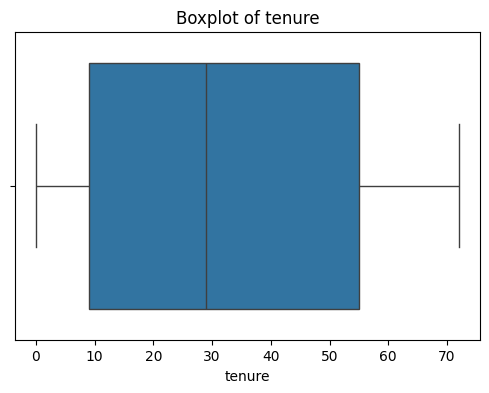

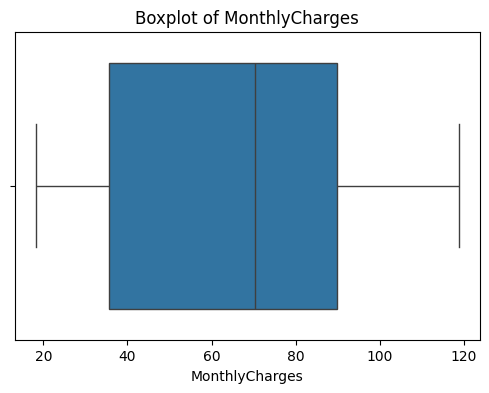

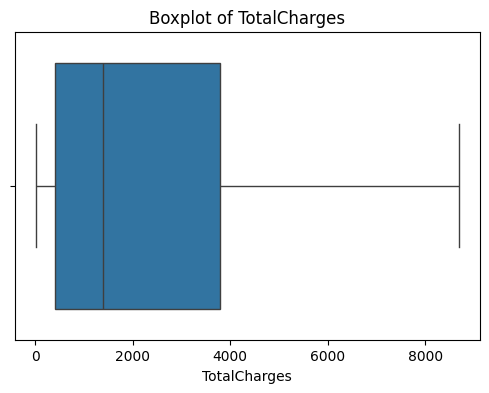

In [11]:
# Boxplots to detect outliers in numeric columns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [12]:
# Overview of categorical columns before cleaning
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns before cleaning:")
for col in cat_cols:
    print(f"\\n{col} unique values:")
    print(df[col].value_counts(dropna=False))

Categorical columns before cleaning:
\ngender unique values:
gender
Male      3555
Female    3488
Name: count, dtype: int64
\nPartner unique values:
Partner
No     3641
Yes    3402
Name: count, dtype: int64
\nDependents unique values:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
\nPhoneService unique values:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
\nMultipleLines unique values:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
\nInternetService unique values:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
\nOnlineSecurity unique values:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
\nOnlineBackup unique values:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
\nDeviceProtection u

## Data Cleaning

#### Handling Missing Values in TotalCharges

In [13]:
missing = df['TotalCharges'].isna().sum()
print("TotalCharges missing values:", missing)

TotalCharges missing values: 11


In [14]:
# Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])
print("New shape after dropping missing TotalCharges:", df.shape)

New shape after dropping missing TotalCharges: (7032, 20)


#### Normalizing Categorical Values

Many service-related columns contain entries like "No internet service" or "No phone service" for customers who don’t have a particular service. For analysis convenience, we will treat these as simply "No". In other words, if a customer doesn’t have internet, then fields like OnlineSecurity, OnlineBackup, etc. which show "No internet service" can be encoded as "No" (since effectively the customer does not have those services). Similarly, "No phone service" in the MultipleLines column will be treated as "No".

In [15]:
# Replace "No internet service"/"No phone service" with "No"
no_internet_cols = ['OnlineSecurity','OnlineBackup','DeviceProtection',
                    'TechSupport','StreamingTV','StreamingMovies']
for col in no_internet_cols:
    df[col] = df[col].replace({'No internet service': 'No'})
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

After this replacement, all service feature columns are consistent binary categories: they have values "Yes" or "No". For example, MultipleLines now is "Yes" if the customer has multiple lines, otherwise "No" (including those who previously had "No phone service").

## Exploratory Data Analysis (EDA)

#### Target Distribution (Churn Rate)

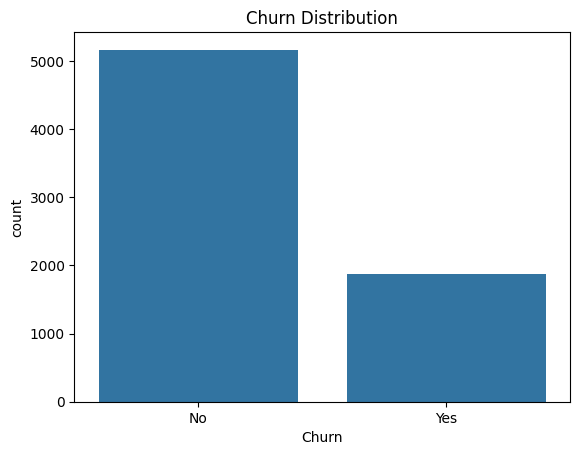

In [16]:
# Plot churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

The majority of customers did not churn – out of 7032 customers, 5163 (≈73.4%) stayed (Churn = No) while 1869 (≈26.6%) left (Churn = Yes). This indicates a class imbalance, with significantly more non-churners than churners.

We indeed have an imbalanced dataset (only ~26.6% churners). 

#### Distribution of numerical features (tenure, monthly charges, total charges)

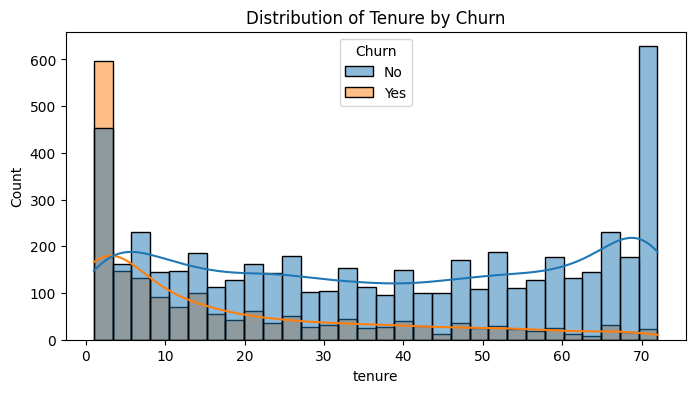

In [18]:
# Distribution of Tenure by Churn
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30)
plt.title(f'Distribution of Tenure by Churn')
plt.show()

The distribution of customer tenure is quite spread out. While it’s roughly uniform across the 0–72 month range, we see a concentration of customers with shorter tenures (many churners are in their first year) and another group with very long tenure (some loyal customers reaching 5–6 years). Notably, a majority of customers who churned tend to have low tenure – in fact, half of churned customers left within their first 10 months, and 75% churned within 29 months. This indicates churn is most likely to occur early in the customer lifecycle. Conversely, customers who have stayed beyond a couple of years are far less likely to churn, evidenced by the long tail of tenure for non-churners.

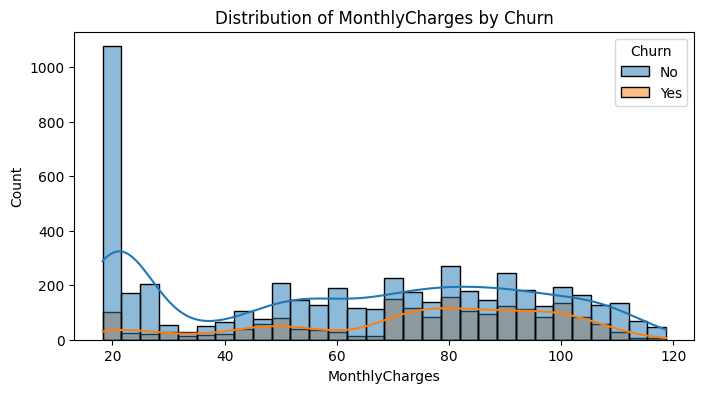

In [19]:
# Distribution of MonthlyCharges by Churn
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, bins=30)
plt.title(f'Distribution of MonthlyCharges by Churn')
plt.show()

Monthly charges range from about $18 to $119. The lower end likely corresponds to customers with only phone service and no internet (hence a low bill), whereas the higher charges are for customers with broadband internet and additional services. We observe that churners tend to have higher monthly bills on average – customers who left were often paying more per month than those who stayed. This could suggest that high-cost plans or bundles might be a pain point leading to churn (or that customers on premium plans expect more and may leave if dissatisfied).

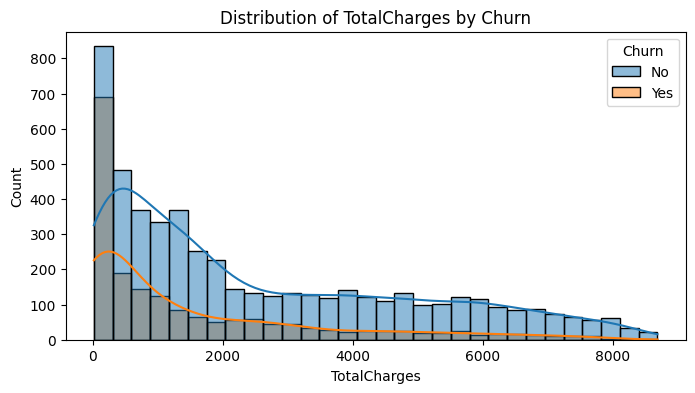

In [20]:
# Distribution of TotalCharges by Churn
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, bins=30)
plt.title(f'Distribution of TotalCharges by Churn')
plt.show()

As a cumulative measure, total charges naturally increase with tenure. The distribution is heavily right-skewed – many customers have low total charges (because they are newer or on low plans), while a smaller set of long-term customers have paid thousands of dollars in total. Churners typically have lower total charges, since they often leave early. Non-churners dominate the high end of total charges (long-tenured, continuously paying customers). Overall, there is a strong correlation between TotalCharges and tenure (since longer tenure means more charges)